# EDA

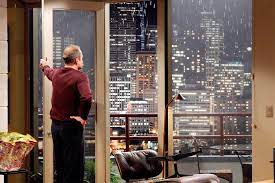

#### Problem 

I have a dataset from the King County housing market. 
The goal is to get a proper overview of the market
- *at least 3 insights* of the overall data
- *one should be geographical*

Additionally, I have a client, William Rodriguez, who is looking for *2 houses* for his wife and himself:
- *countryside (best timing & non-renovated)* 
- *city (fast & central)*

#### 1. set up environment 

done in terminal: 
```pyenv local 3.9.8
python -m venv .venv
source .venv/bin/activate
pip install --upgrade pip
pip install -r requirements.txt
```


#### 2. load packages and set plot style 

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
from datetime import datetime, date, time, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format

#### 3. import data

In [2]:
df_housing = pd.read_csv('data/data_housingmarket.csv')

Column Names and descriptions for King County Data Set

- **id** - unique identifier for a house
- **date** - house was sold
- **price** - is prediction target
- **bedrooms** - # of bedrooms
- **bathrooms** - # of bathrooms
- **sqft_living** - footage of the home
- **sqft_lot** - footage of the lot
- **floors** - floors (levels) in house
- **waterfront** - House which has a view to a waterfront
- **view** - Has been viewed
- **condition** - How good the condition is ( overall )
- **grade** - overall grade given to the housing unit, based on King County grading system
- **sqft_above** - square footage of house apart from basement
- **sqft_basement** - square footage of the basement
- **yr_built** - Built Year
- **yr_renovated** - Year when house was renovated
- **zipcode** - zip
- **lat** - Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

#### 4. get first impression of and prepare data

In [3]:
##check shape 
df_housing.shape
#21597 rows, 21 columns

(21597, 21)

In [4]:
## have a look at head and tail 
df_housing.head()
df_housing.tail()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
21592,9842300095,5.00,2.00,"1,600.00","4,168.00",1.50,0.00,0.00,3,7,...,0.00,1927,0.00,98126,47.53,-122.38,"1,190.00","4,168.00",2014-07-25,"365,000.00"
21593,9842300485,2.00,1.00,"1,040.00","7,372.00",1.00,0.00,0.00,5,7,...,200.00,1939,0.00,98126,47.53,-122.38,"1,930.00","5,150.00",2015-03-11,"380,000.00"
21594,9842300540,3.00,1.00,"1,100.00","4,128.00",1.00,0.00,0.00,4,7,...,380.00,1942,NaN,98126,47.53,-122.38,"1,510.00","4,538.00",2014-06-24,"339,000.00"
21595,9895000040,2.00,1.75,"1,410.00","1,005.00",1.50,0.00,0.00,3,9,...,510.00,2011,0.00,98027,47.54,-122.02,"1,440.00","1,188.00",2014-07-03,"399,900.00"
21596,9900000190,3.00,1.00,"1,320.00","8,100.00",1.00,0.00,0.00,3,6,...,440.00,1943,NaN,98166,47.47,-122.35,"1,000.00","8,100.00",2014-10-30,"268,950.00"


observations: 
- 'waterfront' has either missing values or NaN corresponds to 1=is at waterfront 
- Some duplicates when houses were sold several times
    - just keep the latest info?
- 'view' looks odd
- 'yr_renovated' has some NaNs and 0.000 --> possibly erroreous column? 
- 'sqft_basement' sometimes 0.000 --> might correspond to houses at the waterfront (as they often don't build basements there) 


In [5]:
df_housing.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,"21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","19,206.00","21,534.00","21,597.00","21,597.00","21,597.00","21,145.00","21,597.00","17,749.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00"
mean,"4,580,474,287.77",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60",291.86,"1,971.00",836.65,"98,077.95",47.56,-122.21,"1,986.62","12,758.28","540,296.57"
std,"2,876,735,715.75",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.77,0.65,1.17,827.76,442.49,29.38,"4,000.11",53.51,0.14,0.14,685.23,"27,274.44","367,368.14"
min,"1,000,102.00",1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00,"78,000.00"
25%,"2,123,049,175.00",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00",0.00,"1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00","322,000.00"
50%,"3,904,930,410.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00",0.00,"1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00","450,000.00"
75%,"7,308,900,490.00",4.00,2.50,"2,550.00","10,685.00",2.00,0.00,0.00,4.00,8.00,"2,210.00",560.00,"1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00","645,000.00"
max,"9,900,000,190.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","4,820.00","2,015.00","20,150.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00","7,700,000.00"


'yr_renovated' has weird numbers, seems like a comma is misplaced there. 
Will divide it by 10 to correct

In [6]:
## Divide 'yr_renovated' by 10
df_housing['yr_renovated']=df_housing['yr_renovated']/10
df_housing.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,"21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","19,206.00","21,534.00","21,597.00","21,597.00","21,597.00","21,145.00","21,597.00","17,749.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00"
mean,"4,580,474,287.77",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60",291.86,"1,971.00",83.67,"98,077.95",47.56,-122.21,"1,986.62","12,758.28","540,296.57"
std,"2,876,735,715.75",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.77,0.65,1.17,827.76,442.49,29.38,400.01,53.51,0.14,0.14,685.23,"27,274.44","367,368.14"
min,"1,000,102.00",1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00,"78,000.00"
25%,"2,123,049,175.00",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00",0.00,"1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00","322,000.00"
50%,"3,904,930,410.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00",0.00,"1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00","450,000.00"
75%,"7,308,900,490.00",4.00,2.50,"2,550.00","10,685.00",2.00,0.00,0.00,4.00,8.00,"2,210.00",560.00,"1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00","645,000.00"
max,"9,900,000,190.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","4,820.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00","7,700,000.00"


In [7]:
## get info about each column
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

- 'zip-code' could be a string?
- yr_built, yr_renovated and date should have datatype to datetime
- view should be 0 or 1 as this column only corresponds to 'has been viewed' 

In [8]:
## check for missing values 
df_housing.isnull().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

In [9]:
# missing values as %
df_housing.isnull().sum() / df_housing.shape[0]*100

id               0.00
bedrooms         0.00
bathrooms        0.00
sqft_living      0.00
sqft_lot         0.00
floors           0.00
waterfront      11.07
view             0.29
condition        0.00
grade            0.00
sqft_above       0.00
sqft_basement    2.09
yr_built         0.00
yr_renovated    17.82
zipcode          0.00
lat              0.00
long             0.00
sqft_living15    0.00
sqft_lot15       0.00
date             0.00
price            0.00
dtype: float64

observations: 
- missing data for 'waterfront', 'view', 'sqft_basement', 'yr_renovated'

In [10]:
##change data types of date columns to datetime

# change 'date' to Y-m-d datetime data type
df_housing['date'] = pd.to_datetime(df_housing['date'], format = '%Y-%m-%d')
type(df_housing['date'][0])

# change 'yr_built' to Y datetime data type
df_housing['yr_built'] = pd.to_datetime(df_housing['yr_built'], format = '%Y')
type(df_housing['yr_built'][0])

# change 'yr_renovated' to Y-m-d datetime data type
#df_housing['yr_renovated'] = pd.to_datetime(df_housing['yr_renovated'], format = '%Y')
#type(df_housing['yr_renovated'][0])
# problem here because of missing data! 'time data '0' does not match format '%Y' (match)'

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
df_housing['yr_renovated'].nunique()

70

In [12]:
# dispaly rows with yr_renovated = 0
df_housing.query('yr_renovated == 0')

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,1000102,6.00,3.00,"2,400.00","9,373.00",2.00,NaN,0.00,3,7,...,0.00,1991-01-01,0.00,98002,47.33,-122.21,"2,060.00","7,316.00",2015-04-22,"300,000.00"
1,1000102,6.00,3.00,"2,400.00","9,373.00",2.00,NaN,0.00,3,7,...,0.00,1991-01-01,0.00,98002,47.33,-122.21,"2,060.00","7,316.00",2014-09-16,"280,000.00"
2,1200019,4.00,1.75,"2,060.00","26,036.00",1.00,NaN,0.00,4,8,...,900.00,1947-01-01,0.00,98166,47.44,-122.35,"2,590.00","21,891.00",2014-05-08,"647,500.00"
3,1200021,3.00,1.00,"1,460.00","43,000.00",1.00,0.00,0.00,3,7,...,0.00,1952-01-01,0.00,98166,47.44,-122.35,"2,250.00","20,023.00",2014-08-11,"400,000.00"
4,2800031,3.00,1.00,"1,430.00","7,599.00",1.50,0.00,0.00,4,6,...,420.00,1930-01-01,0.00,98168,47.48,-122.27,"1,290.00","10,320.00",2015-04-01,"235,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,9839301165,2.00,1.00,"1,570.00","4,400.00",1.50,0.00,0.00,4,8,...,0.00,1914-01-01,0.00,98122,47.61,-122.29,"1,850.00","4,400.00",2014-10-01,"998,500.00"
21591,9842300036,3.00,1.00,"1,310.00","4,163.00",1.00,0.00,0.00,4,7,...,0.00,1964-01-01,0.00,98126,47.53,-122.38,"1,120.00","4,166.00",2014-10-08,"415,885.00"
21592,9842300095,5.00,2.00,"1,600.00","4,168.00",1.50,0.00,0.00,3,7,...,0.00,1927-01-01,0.00,98126,47.53,-122.38,"1,190.00","4,168.00",2014-07-25,"365,000.00"
21593,9842300485,2.00,1.00,"1,040.00","7,372.00",1.00,0.00,0.00,5,7,...,200.00,1939-01-01,0.00,98126,47.53,-122.38,"1,930.00","5,150.00",2015-03-11,"380,000.00"


That's 17005 rows without info about the renovation. Will assume 0 == no renovation took place. Will recode it to NaN. 

In [13]:
## recode yr_renovated = 0 to NaN and then change data type to datetime
df_housing['yr_renovated'] = df_housing['yr_renovated'].replace({'0':np.nan, 0:np.nan})
df_housing['yr_renovated'].head()

df_housing['yr_renovated'].isnull().sum()
# now 20853 missing values --> renovation info only for 744 houses (for sure)
df_housing['yr_renovated'].nunique()

69

In [14]:
## Now, try to convert to datetime data type again
df_housing['yr_renovated'] = pd.to_datetime(df_housing['yr_renovated'], format = '%Y')
type(df_housing['yr_renovated'][0])

pandas._libs.tslibs.nattype.NaTType

Data type of yr_renovated is now 'NaTType' which means it's 'Not a Time', as there are a lot of missing values. But the other values should be of datetime now. 

In [15]:
df_housing.describe()
#since yr_renovated is not included in the output anymore, changing the date type worked!

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,"21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","19,206.00","21,534.00","21,597.00","21,597.00","21,597.00","21,145.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00"
mean,"4,580,474,287.77",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60",291.86,"98,077.95",47.56,-122.21,"1,986.62","12,758.28","540,296.57"
std,"2,876,735,715.75",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.77,0.65,1.17,827.76,442.49,53.51,0.14,0.14,685.23,"27,274.44","367,368.14"
min,"1,000,102.00",1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,"98,001.00",47.16,-122.52,399.00,651.00,"78,000.00"
25%,"2,123,049,175.00",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00","322,000.00"
50%,"3,904,930,410.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00","450,000.00"
75%,"7,308,900,490.00",4.00,2.50,"2,550.00","10,685.00",2.00,0.00,0.00,4.00,8.00,"2,210.00",560.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00","645,000.00"
max,"9,900,000,190.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","4,820.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00","7,700,000.00"


'Waterfront': Check which values we have. 

In [16]:
## check waterfront values
df_housing.query('waterfront == 1') # 146 rows
df_housing.query('waterfront == 0') # 19060 rows
df_housing['waterfront'].isnull().sum() #2391 NaNs

2391

In [17]:
## check for missing values 
df_housing.isnull().sum() / df_housing.shape[0]*100

id               0.00
bedrooms         0.00
bathrooms        0.00
sqft_living      0.00
sqft_lot         0.00
floors           0.00
waterfront      11.07
view             0.29
condition        0.00
grade            0.00
sqft_above       0.00
sqft_basement    2.09
yr_built         0.00
yr_renovated    96.56
zipcode          0.00
lat              0.00
long             0.00
sqft_living15    0.00
sqft_lot15       0.00
date             0.00
price            0.00
dtype: float64

- waterfront is missing 12% of values
- view only missing 0.29% values
- sqft_basement missing 2% values
- yr_renovated missing 96% values

In [18]:
## check view values
df_housing['view'].value_counts()

# --> will assume that 1,2,3,4 means it had been viewed. 

0.00    19422
2.00      957
3.00      508
1.00      330
4.00      317
Name: view, dtype: int64

We have douplicate columns of houses that have been sold several times. 
Keep only the most recent data. 

In [19]:
## take care of duplicates
# sort df according to date and drop duplicates but the latest
df_housing2 = df_housing.sort_values('date').drop_duplicates('id',keep='last')
df_housing2.reset_index(inplace=True, drop=True)
df_housing[df_housing.id == 1000102]
df_housing2[df_housing.id == 1000102]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,1000102,6.00,3.00,"2,400.00","9,373.00",2.00,NaN,0.00,3,7,...,0.00,1991-01-01,NaT,98002,47.33,-122.21,"2,060.00","7,316.00",2015-04-22,"300,000.00"


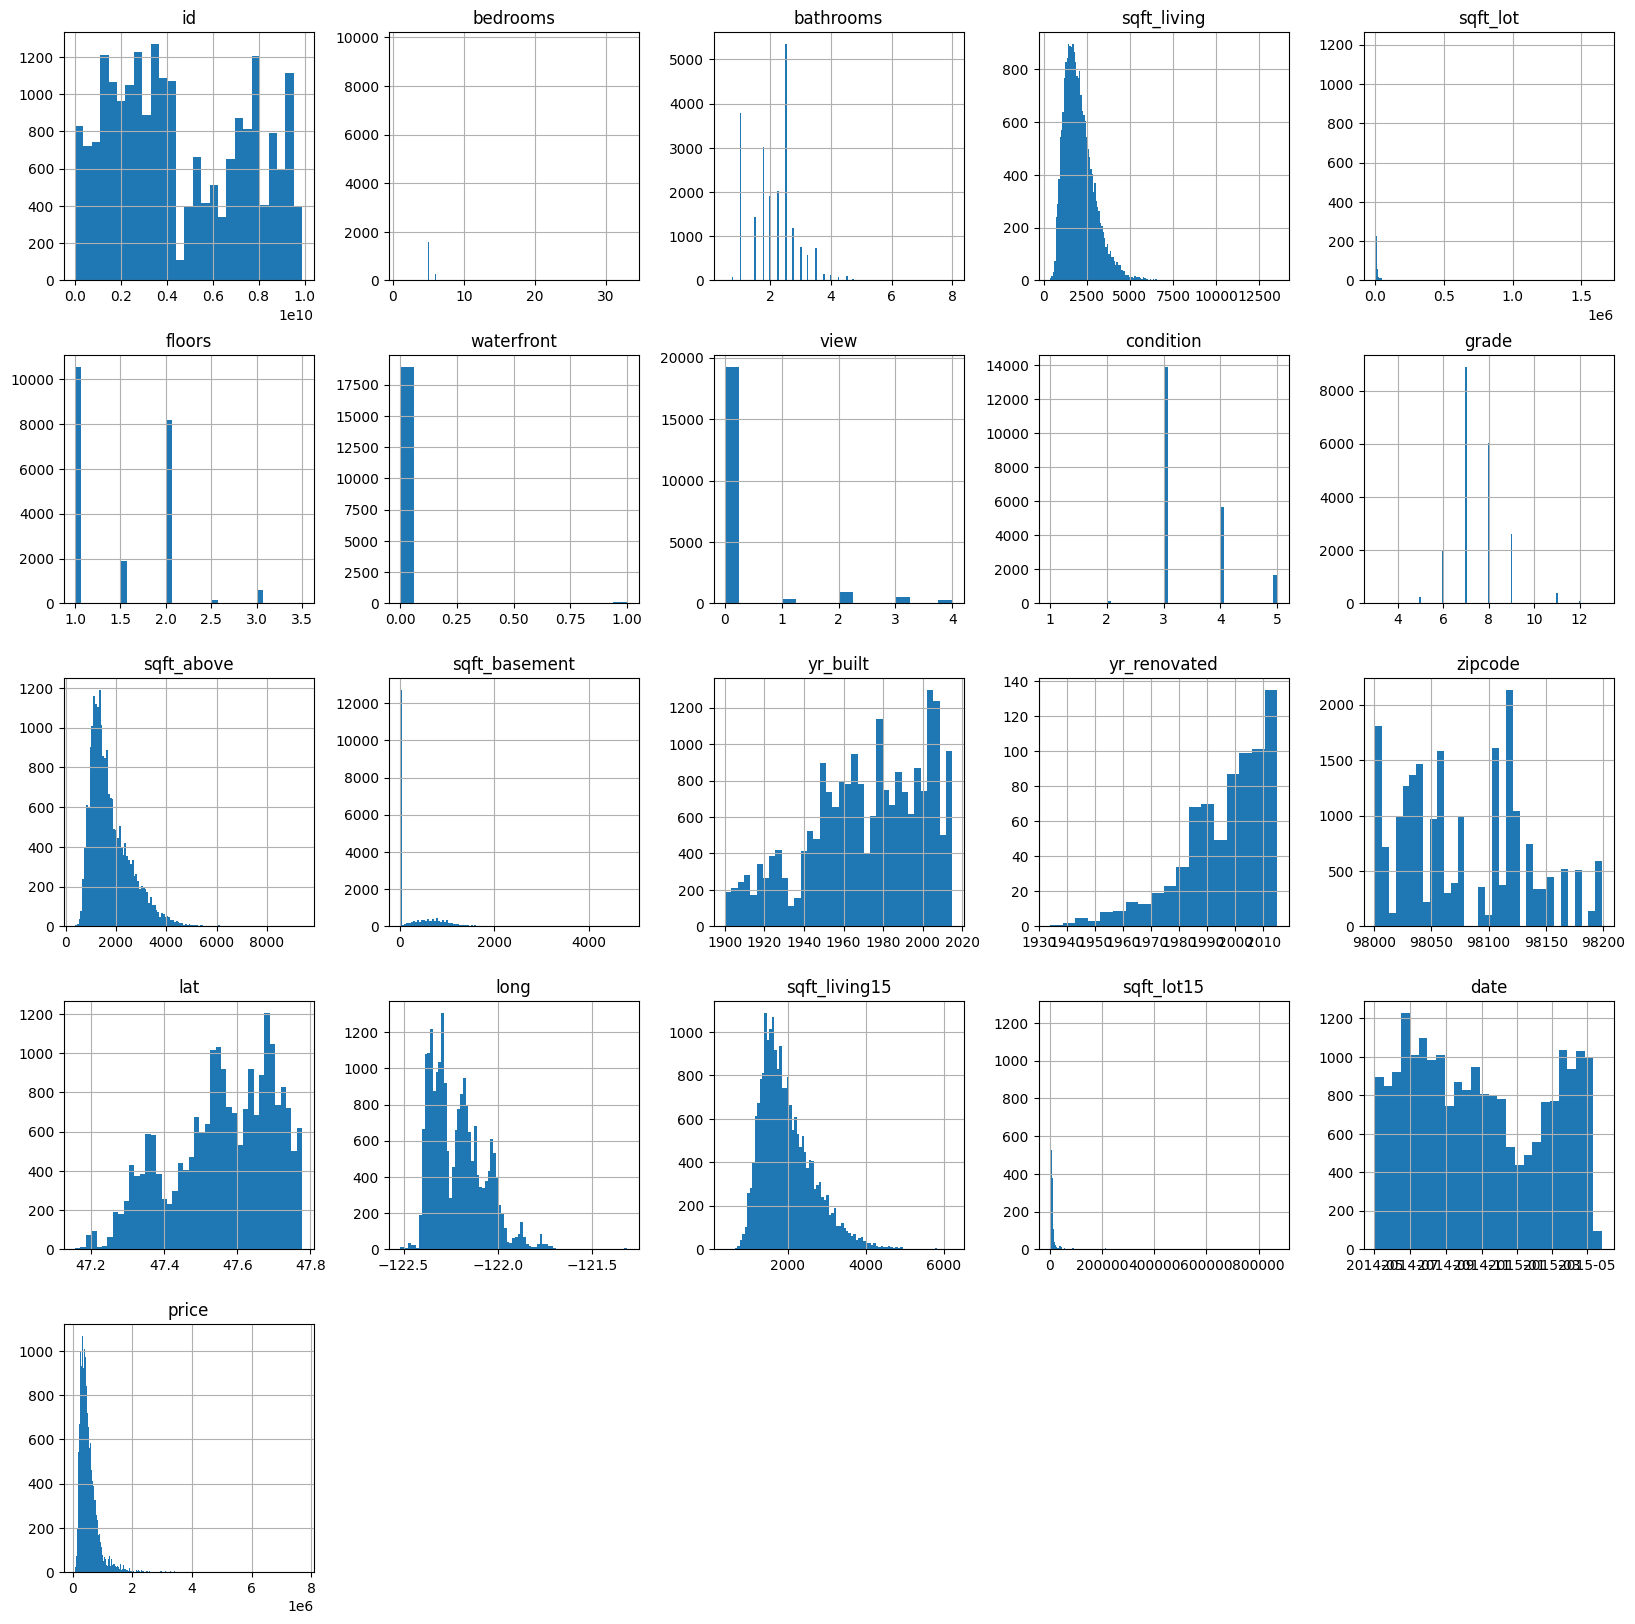

In [25]:
df_housing2.hist(bins = "auto", figsize = (20,20));

In [35]:
##check Skewness and Kurtosis for different variables
df_housing2['sqft_living'].agg(['skew', 'kurtosis']).transpose()

skew       1.47
kurtosis   5.26
Name: sqft_living, dtype: float64

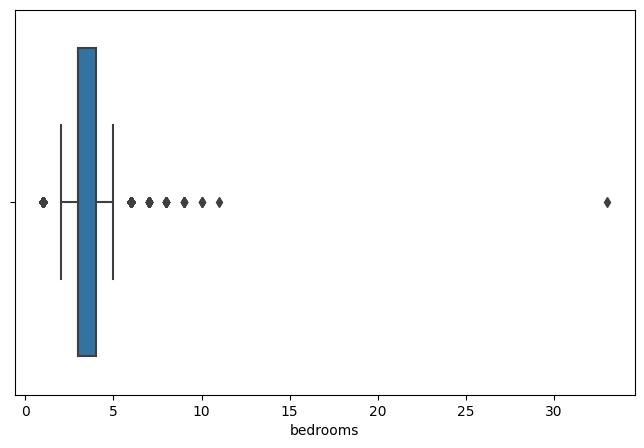

In [42]:
ax = sns.boxplot(x=df_housing2['bedrooms'])

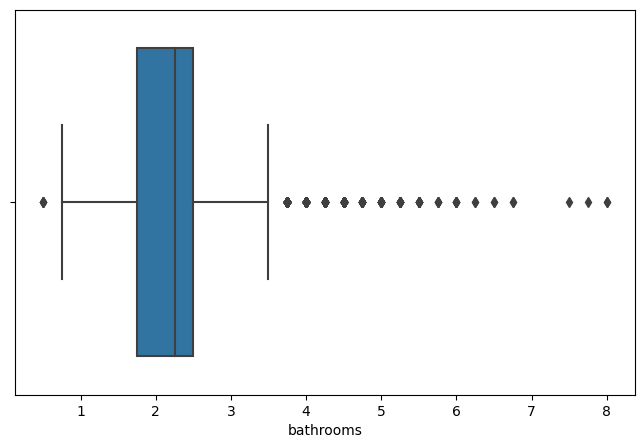

In [41]:
ax = sns.boxplot(x=df_housing2['bathrooms'])

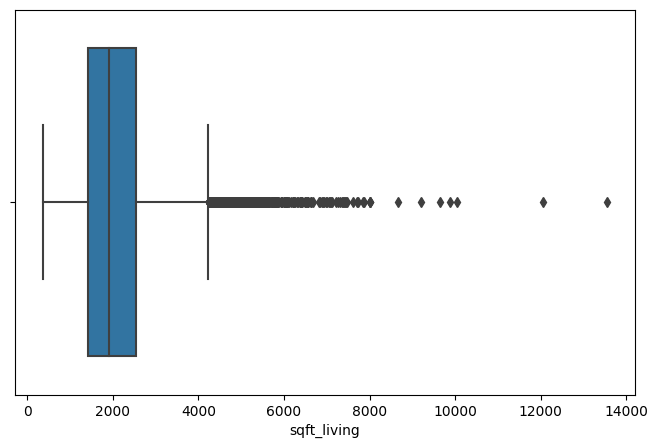

In [43]:
ax = sns.boxplot(x=df_housing2['sqft_living'])

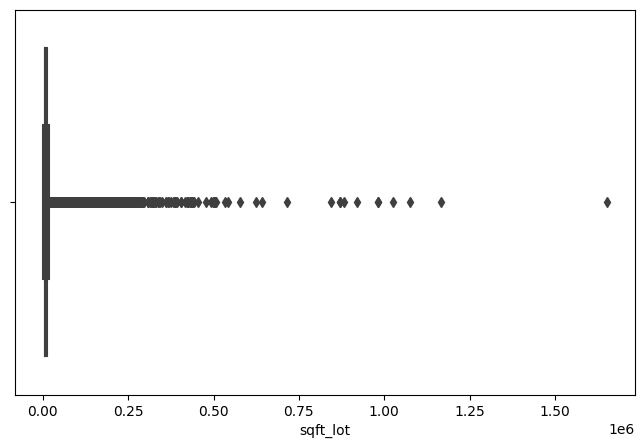

In [44]:
ax = sns.boxplot(x=df_housing2['sqft_lot'])

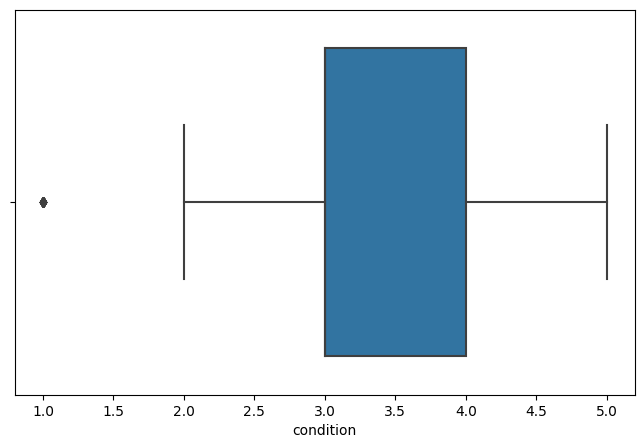

In [46]:
ax = sns.boxplot(x=df_housing2['condition'])

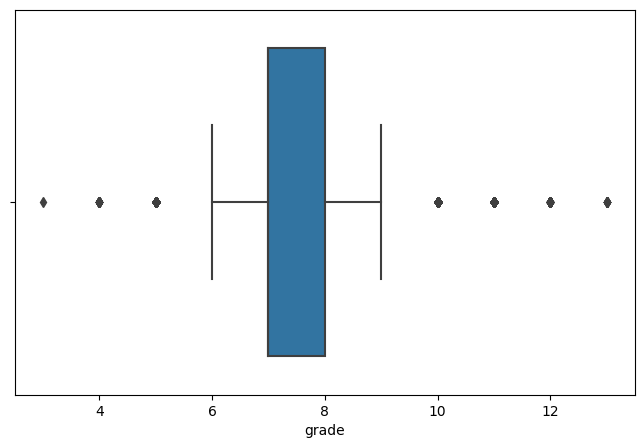

In [49]:
ax = sns.boxplot(x=df_housing2['grade'])

In [51]:
df_housing2.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.00,0.00,0.00,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,-0.01,-0.00,0.02,-0.00,-0.14,-0.02
bedrooms,0.00,1.00,0.52,0.58,0.03,0.18,-0.00,0.08,0.03,0.36,0.48,0.30,-0.16,-0.01,0.13,0.39,0.03,0.31
bathrooms,0.00,0.52,1.00,0.76,0.09,0.50,0.07,0.19,-0.13,0.67,0.69,0.28,-0.20,0.02,0.22,0.57,0.09,0.53
sqft_living,-0.01,0.58,0.76,1.00,0.17,0.35,0.11,0.28,-0.06,0.76,0.88,0.43,-0.20,0.05,0.24,0.76,0.18,0.70
sqft_lot,-0.13,0.03,0.09,0.17,1.00,-0.01,0.02,0.08,-0.01,0.11,0.18,0.02,-0.13,-0.09,0.23,0.14,0.72,0.09
floors,0.02,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.27,0.46,0.52,-0.25,-0.06,0.05,0.12,0.28,-0.01,0.25
waterfront,-0.00,-0.00,0.07,0.11,0.02,0.02,1.00,0.41,0.02,0.09,0.08,0.09,0.03,-0.01,-0.04,0.09,0.03,0.28
view,0.01,0.08,0.19,0.28,0.08,0.03,0.41,1.00,0.04,0.25,0.17,0.28,0.09,0.01,-0.08,0.28,0.07,0.40
condition,-0.02,0.03,-0.13,-0.06,-0.01,-0.27,0.02,0.04,1.00,-0.15,-0.16,0.17,0.00,-0.02,-0.11,-0.10,-0.00,0.03
grade,0.01,0.36,0.67,0.76,0.11,0.46,0.09,0.25,-0.15,1.00,0.76,0.17,-0.18,0.11,0.20,0.71,0.12,0.67


<AxesSubplot:>

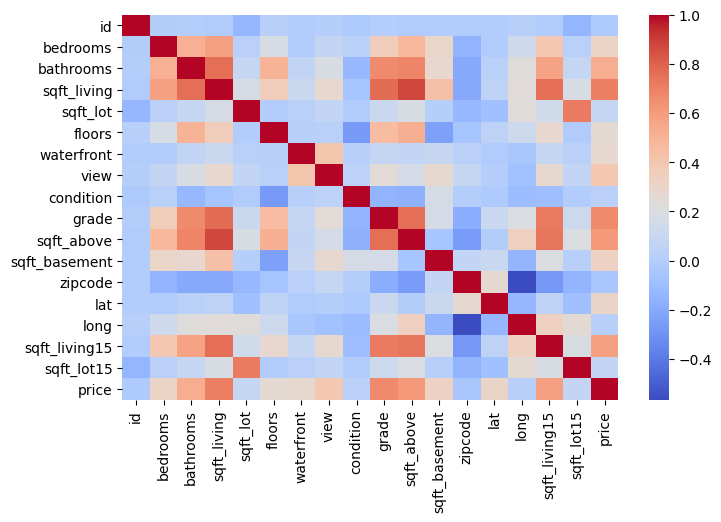

In [54]:
sns.heatmap(df_housing2.corr(), annot=False, cmap='coolwarm')

Now I want to know where 'city' and where 'rural' is. 
I define this by looking for 'King County, WA' at google maps. 
Here I found that around longitude -121.973624 is the threshold between 'city' and 'country'. So I will create 1 new variable: 'countryside', either 0 or 1 corresponding to longitude of the house. 

<img src="city_country.png" width = 500>

In [56]:
## Create a dummy classifier for countryside or not
df_housing2['countryside'] = np.where(df_housing2.long > -121.973624, 1, 0)

## Create a dummy classifier for city centre or not
df_housing2.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,countryside
4210,1737320120,5.00,2.50,"2,210.00","9,655.00",1.00,0.00,0.00,3,8,...,1976-01-01,NaT,98011,47.77,-122.22,"2,080.00","8,633.00",2014-05-02,"470,000.00",0
13482,5561000190,3.00,2.25,"1,970.00","35,100.00",2.00,0.00,0.00,4,9,...,1977-01-01,NaT,98027,47.46,-121.99,"2,340.00","35,100.00",2014-05-02,"437,500.00",0
19134,8673400086,3.00,2.50,"1,270.00","1,180.00",3.00,0.00,0.00,3,8,...,2001-01-01,NaT,98107,47.67,-122.39,"1,320.00","1,180.00",2014-05-02,"445,700.00",0
4743,1868902745,3.00,2.00,"2,710.00","4,500.00",1.50,0.00,0.00,4,8,...,1929-01-01,NaT,98115,47.67,-122.30,"2,060.00","4,500.00",2014-05-02,"805,000.00",0
4263,1771000430,3.00,1.00,"1,160.00","9,180.00",1.00,0.00,0.00,3,7,...,1968-01-01,NaT,98077,47.74,-122.07,"1,160.00","10,282.00",2014-05-02,"315,000.00",0



Then another with 'city_centre'. A quick search on google gave me 11 neighborhoods when searching for "seattle central neighborhoods". On google maps, this resulted in longitudes between -122.256696 and -122.4174656 and latitudes between 47.686815 and 47.495760. 

In [65]:


## Create a dummy classifier for countryside or not
df_housing2['city_centre'] = np.where((df_housing2.long > -122.417465) & (df_housing2.long < -122.256696) & (df_housing2.lat < 47.686815) & (df_housing2.lat > 47.495760) , 1, 0)

## Create a dummy classifier for city centre or not
df_housing2.tail()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,countryside,city_centre
12446,5057100110,5.00,3.00,"3,223.00","6,371.00",2.00,0.00,0.00,3,9,...,NaT,98042,47.36,-122.16,"1,979.00","9,008.00",2015-05-14,"479,349.00",0,0
3277,1422700040,3.00,1.00,"1,170.00","7,320.00",1.00,0.00,0.00,3,7,...,NaT,98188,47.47,-122.28,"2,040.00","7,320.00",2015-05-14,"183,000.00",0,0
17865,7923600250,5.00,2.00,"1,870.00","7,344.00",1.50,0.00,0.00,3,7,...,NaT,98007,47.60,-122.14,"1,870.00","7,650.00",2015-05-15,"450,000.00",0,0
12539,5101400871,2.00,1.75,"1,390.00","6,670.00",1.00,0.00,0.00,3,6,...,NaT,98115,47.69,-122.31,920.00,"6,380.00",2015-05-24,"445,500.00",0,0
19980,9106000005,4.00,2.25,"3,750.00","5,000.00",2.00,0.00,0.00,5,8,...,NaT,98115,47.67,-122.30,"2,170.00","4,590.00",2015-05-27,"1,310,000.00",0,1


This worked! I now have 2 new variables declaring whether the house is in the city centre (0/1) or on the countryside (0/1). 